In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
import gentrl
import numpy as np

import susi
from susi.SOMPlots import plot_estimation_map, plot_som_histogram, plot_umatrix

In [5]:
import requests

def notify():
    url = "https://notificationer.glitch.me/notify"

    payload = "{ \"id\":\"qqkyzsb22d01lmkycbl\", \"text\":\"Project Ready!\" }"
    headers = {
        'Content-Type': "application/json",
        'Authorization': "Basic Og=="
        }

    response = requests.request("POST", url, data=payload, headers=headers)

In [7]:
df = pd.read_csv("./train_ic50_3_filtered.csv")

In [8]:
smiles = []
for i in df["Smiles"]:
    smiles.append(gentrl.tokenizer.encode([i])[0][0])
smiles = np.array([i.numpy() for i in smiles])

In [9]:
values = list(df["IC50"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(smiles), np.array(values),
    test_size=0.1, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1172, 50) (131, 50) (1172,) (131,)


In [46]:
som = susi.SOMRegressor(
    n_rows=40,
    n_columns=40,
    n_iter_unsupervised=900000,
    n_iter_supervised=600000,
    #neighborhood_mode_unsupervised="root",
    #neighborhood_mode_supervised="root",
    learn_mode_unsupervised="min",
    learn_mode_supervised="min",
    #learning_rate_start=0.2,
    #learning_rate_end=0.,
    #random_state=None,
    n_jobs=1)

In [47]:
som.fit(X_train, y_train)
notify()

In [48]:
y_pred = som.predict(X_test)
y_pred_train = som.predict(X_train)

print("Train: {0:.1f} %".format(r2_score(y_train, y_pred_train)*100))
print("Test: {0:.1f} %".format(r2_score(y_test, y_pred)*100))

Train: 67.0 %
Test: 48.8 %


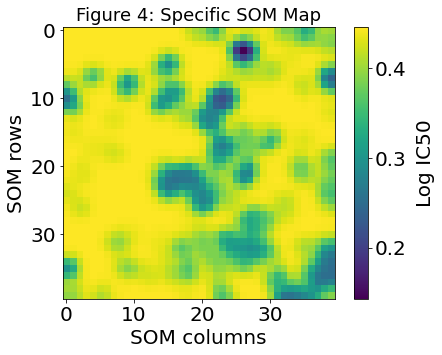

In [5]:
estimation_map = np.squeeze(som.get_estimation_map())
plot_estimation_map(
    estimation_map, cbar_label="Log IC50", cmap="viridis")
plt.title("Figure 4: Specific SOM Map",  fontsize=18)
plt.show()

In [36]:
pickle.dump(som, open("specific_leish_som_800K_3.p", "wb"))

In [3]:
som = pickle.load(open("specific_leish_som_800K_2.p", "rb"))